<a href="https://colab.research.google.com/github/nathanschoeck/Generative-AI/blob/main/Image_Generation_using_OpenAI_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip uninstall openai

Found existing installation: openai 1.59.6
Uninstalling openai-1.59.6:
  Would remove:
    /usr/local/bin/openai
    /usr/local/lib/python3.11/dist-packages/openai-1.59.6.dist-info/*
    /usr/local/lib/python3.11/dist-packages/openai/*
Proceed (Y/n)? Y
  Successfully uninstalled openai-1.59.6


In [6]:
pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.1 MB/s eta 0:00:00


Enter a description for the image: Man holding an apple
Generating image...
Image generated successfully! Here is the URL:
1. https://oaidalleapiprodscus.blob.core.windows.net/private/org-lHamXhxrkNz3dBvj83iqxSWH/user-KvsJcFEq3y970laB6kGLGbTw/img-rSpRHapdwDUhkEyRpBMrX83i.png?st=2025-01-18T02%3A23%3A55Z&se=2025-01-18T04%3A23%3A55Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-01-18T00%3A41%3A19Z&ske=2025-01-19T00%3A41%3A19Z&sks=b&skv=2024-08-04&sig=h4ivlOJB82MxBCYpUeMWK/Ja/amV5iH3jQhZxcB0ZRo%3D


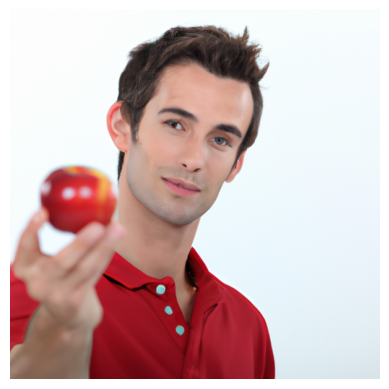

In [2]:
import openai
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

openai.api_key = "sensitive"

def generate_image(prompt, n=1, size="1024x1024"):
    """
    Generate images using the OpenAI API (new structure).

    Parameters:
        prompt (str): The text description for the image to be generated.
        n (int): The number of images to generate (default is 1).
        size (str): The size of the generated images (options: "256x256", "512x512", "1024x1024").

    Returns:
        list: A list of URLs for the generated images.
    """
    try:
        response = openai.Image.create(
            prompt=prompt,
            n=n,
            size=size
        )
        image_urls = [data["url"] for data in response.data]
        return image_urls
    except Exception as e:
        print(f"Error generating image: {e}")
        return []

def display_image_from_url(url):
    """
    Fetch and display an image from a URL.

    Parameters:
        url (str): The URL of the image to display.
    """
    try:
        # Fetch the image from the URL
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes

        # Convert the content into an image
        img = Image.open(BytesIO(response.content))

        # Display the image using matplotlib
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.show()

    except Exception as e:
        print(f"Error displaying the image: {e}")

if __name__ == "__main__":
    # User input for the prompt
    prompt = input("Enter a description for the image: ")

    # Generate image
    print("Generating image...")
    image_urls = generate_image(prompt, n=1, size="512x512")

    if image_urls:
        print("Image generated successfully! Here is the URL:")
        for i, url in enumerate(image_urls, start=1):
            print(f"{i}. {url}")
    else:
        print("Failed to generate image.")

    # Display the image
    display_image_from_url(url)
